---

# 🤖 What is an **Artificial Neural Network (ANN)?**

---

## 👶 Baby-Level Definition:

> An **Artificial Neural Network (ANN)** is a **computer brain** inspired by the **human brain**, made up of **tiny units called neurons**, which **work together to learn things** — like recognizing pictures, reading handwriting, or predicting future numbers.

---

## 🧠 1. ANN = A Brain Made of Math

Just like your brain has **billions of neurons**, an ANN has **artificial neurons** connected together in **layers**.

Each neuron:

* Takes **inputs**
* Does **a little math** (adds and multiplies)
* Passes the result to the **next neurons**

That’s how it “thinks.”

---

## 🧱 2. Structure of an ANN

### A Basic ANN Has 3 Types of Layers:

| Layer Type             | What It Does                                                         |
| ---------------------- | -------------------------------------------------------------------- |
| 🟢 **Input Layer**     | Gets the raw data (like pixels of an image or values in a table)     |
| 🔵 **Hidden Layer(s)** | Does the actual thinking — math, patterns, learning, transformations |
| 🔴 **Output Layer**    | Gives the final result (like "Cat" or "Dog" or price = ₹123.45)      |

---

### 🎨 Visual Example

```
 Input Layer      Hidden Layer         Output Layer
[ x1 ]  ─┬──▶  [ o ] ─┬──▶
[ x2 ]  ─┼──▶  [ o ] ─┼──▶    [ result ]
[ x3 ]  ─┴──▶  [ o ] ─┴──▶
```

* Each line is a **connection (weight)**
* Each \[ o ] is a **neuron**

---

## ⚙️ 3. What Happens Inside a Neuron?

Each neuron does:

```
output = activation(w₁x₁ + w₂x₂ + ... + b)
```

Where:

| Symbol       | Meaning                               |
| ------------ | ------------------------------------- |
| x₁, x₂       | Inputs from previous layer            |
| w₁, w₂       | Weights (how important each input is) |
| b            | Bias (a little push-up or push-down)  |
| activation() | A function to add non-linearity       |

---

## 💡 4. What Does the ANN Actually Learn?

> The ANN **learns the best weights and biases** so that it can give the correct output for a given input.

This is done using:

* **Forward pass**: Make a guess (prediction)
* **Loss function**: Check how wrong it is
* **Backpropagation + Gradient Descent**: Fix the weights to do better next time (like learning from mistakes)

---

## 🧃 Real-Life Analogy: Juice Machine

Imagine you’re making juice:

1. 🍎 You put apple, orange, and banana (inputs)
2. 🧠 Machine mixes them in hidden chambers (hidden layers)
3. 🥤 You get mango juice at the end (output)

Now, the machine learns which fruits and how much gives you **mango juice** — it changes its internal knobs (weights) to improve over time!

---

## 🛠️ 5. How Do You Make an ANN?

### In Python using Keras:

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))  # Hidden Layer
model.add(Dense(1, activation='sigmoid'))            # Output Layer

model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, y_train, epochs=10)
```

---

## 🧠 6. Where Are ANNs Used?

* 🖼️ Image Recognition (like face unlock)
* 📈 Stock Prediction
* 📧 Spam Email Detection
* 🏥 Disease Diagnosis
* 🤖 Smart Chatbots

---

## 📊 ANN vs Traditional ML

| Feature                       | ANN (Neural Nets)               | Traditional ML (e.g., SVM, Decision Tree) |
| ----------------------------- | ------------------------------- | ----------------------------------------- |
| Requires feature engineering? | ❌ Learns features automatically | ✅ You design features manually            |
| Can learn complex patterns?   | ✅ Yes, very deep                | ⚠️ Sometimes limited                      |
| Training time                 | 🐢 Slow to train                | ⚡ Often faster                            |

---

## 🎯 TL;DR

> An **Artificial Neural Network (ANN)** is like a **digital brain**:
>
> * Takes inputs 👂
> * Thinks in hidden layers 🧠
> * Gives a decision/output 🗣️
> * Learns from its mistakes using math 🧮

It’s the **foundation of deep learning** — and you’re now mastering it like a pro! 💪

---



In [73]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("blastchar/telco-customer-churn")

# print("Path to dataset files:", path)

In [74]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../../Datasets/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4688,2988-GBIVW,Female,1,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.85,6470.1,No
2478,7878-JGDKK,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,44.55,220.75,No
2155,0524-IAVZO,Female,0,Yes,No,30,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,2624.25,Yes
3839,8387-UGUSU,Female,0,Yes,Yes,15,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,284.3,No
3074,4504-YOULA,Female,0,Yes,Yes,35,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),59.45,2136.9,No


In [77]:
df.drop('customerID',axis='columns',inplace=True) # Here inplace true will update the dataframe
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 **If you look here you will see that our total charges are in a object form annd our monthly charges are in float64 how isit?**
we need to fix this by converting the object to numeric

In [78]:
df.shape

(7043, 20)

In [79]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

**Here this error is saying that your total charges columns also contains spaces between the string**

In [80]:
pd.to_numeric(df.TotalCharges,errors='coerce') # Here the errors coerce will ignore any errors within the column

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

#### Now here we have done it but we need to find the spaced values 

In [81]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [82]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()] # It will serve as an index and will return all the true values

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


**Now here these rows are of no use because they are missing the totalcharges only it will be a fault in our model so lets dorp them**

In [83]:
df1 = df[df.TotalCharges!=" "]
df1.shape , df.shape

((7032, 20), (7043, 20))

In [84]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [85]:
# Changing from object to int
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Nabeel\AppData\Local\Temp\ipykernel_5864\2337213276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [86]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [87]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

#### Now look tenure is an intresting feature we will look how our loyal customers are leaving

In [88]:
tenure_churn_no = df1[df1.Churn == "No"].tenure

In [89]:
tenure_churn_yes = df1[df1.Churn == "Yes"].tenure

Text(0, 0.5, 'Number of customers')

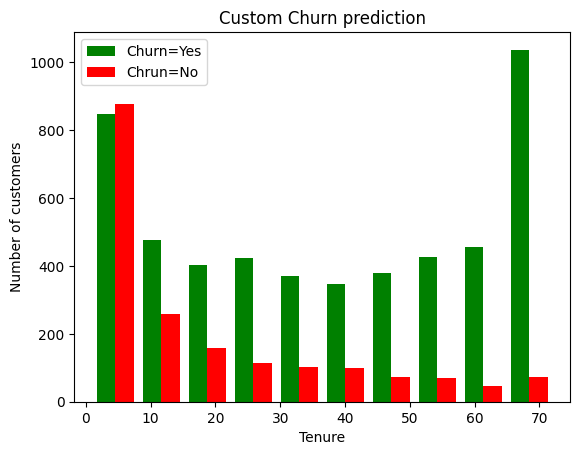

In [90]:
plt.hist([tenure_churn_no,tenure_churn_yes],color=['green','red'],label=['Churn=Yes','Chrun=No'])
plt.legend()
plt.title("Custom Churn prediction")
plt.xlabel("Tenure")
plt.ylabel("Number of customers")

See most of your loyal customers are not leaving in the 70s section 70(months)

Text(0, 0.5, 'Number of customers')

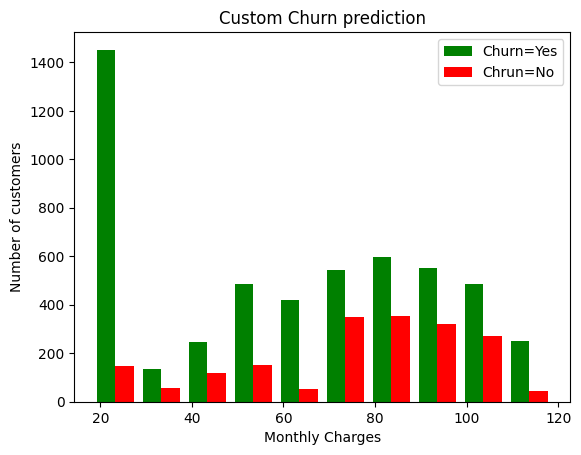

In [91]:
mc_churn_yes = df1[df1.Churn == "Yes"].MonthlyCharges
mc_churn_no = df1[df1.Churn == "No"].MonthlyCharges
plt.hist([mc_churn_no,mc_churn_yes],color=['green','red'],label=['Churn=Yes','Chrun=No'])
plt.legend()
plt.title("Custom Churn prediction")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")

In [92]:
def print_unique_col_values(df):
    for columns in df:
        if df[columns].dtypes == 'object':
            print(f"{columns} - {df[columns].unique()}")

In [93]:
print_unique_col_values(df1)

gender - ['Female' 'Male']
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
PhoneService - ['No' 'Yes']
MultipleLines - ['No phone service' 'No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes' 'No internet service']
OnlineBackup - ['Yes' 'No' 'No internet service']
DeviceProtection - ['No' 'Yes' 'No internet service']
TechSupport - ['No' 'Yes' 'No internet service']
StreamingTV - ['No' 'Yes' 'No internet service']
StreamingMovies - ['No' 'Yes' 'No internet service']
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn - ['No' 'Yes']


In [94]:
df1.replace('No internet service','No',inplace=True)

C:\Users\Nabeel\AppData\Local\Temp\ipykernel_5864\3939576099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)


In [95]:
df1.replace('No phone service','No',inplace=True)

C:\Users\Nabeel\AppData\Local\Temp\ipykernel_5864\628100714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [96]:
print_unique_col_values(df1)

gender - ['Female' 'Male']
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
PhoneService - ['No' 'Yes']
MultipleLines - ['No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes']
OnlineBackup - ['Yes' 'No']
DeviceProtection - ['No' 'Yes']
TechSupport - ['No' 'Yes']
StreamingTV - ['No' 'Yes']
StreamingMovies - ['No' 'Yes']
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn - ['No' 'Yes']


In [97]:
print_unique_col_values(df1)

gender - ['Female' 'Male']
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
PhoneService - ['No' 'Yes']
MultipleLines - ['No' 'Yes']
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - ['No' 'Yes']
OnlineBackup - ['Yes' 'No']
DeviceProtection - ['No' 'Yes']
TechSupport - ['No' 'Yes']
StreamingTV - ['No' 'Yes']
StreamingMovies - ['No' 'Yes']
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - ['Yes' 'No']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn - ['No' 'Yes']


In [98]:
yes_no_columns = ['gender','Partner','Dependents' ,'PhoneService', 'MultipleLines' ,'OnlineSecurity' ,'OnlineBackup' ,'DeviceProtection' ,'TechSupport', 'StreamingTV', 'StreamingMovies' ,'PaperlessBilling', 'Churn' ]

for col in yes_no_columns:
    df1[col].replace({"Yes":1,"No":0},inplace=True)

C:\Users\Nabeel\AppData\Local\Temp\ipykernel_5864\166355507.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({"Yes":1,"No":0},inplace=True)
C:\Users\Nabeel\AppData\Local\Temp\ipykernel_5864\166355507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({"Yes":1,"No":0},inplace=True)
C:\Users\Nabeel\AppData\L

In [99]:
print_unique_col_values(df1)

gender - ['Female' 'Male']
InternetService - ['DSL' 'Fiber optic' 'No']
Contract - ['Month-to-month' 'One year' 'Two year']
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [100]:
for columns in df1:
    print(f"{columns} - {df1[columns].unique()}")

gender - ['Female' 'Male']
SeniorCitizen - [0 1]
Partner - [1 0]
Dependents - [0 1]
tenure - [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService - [0 1]
MultipleLines - [0 1]
InternetService - ['DSL' 'Fiber optic' 'No']
OnlineSecurity - [0 1]
OnlineBackup - [1 0]
DeviceProtection - [0 1]
TechSupport - [0 1]
StreamingTV - [0 1]
StreamingMovies - [0 1]
Contract - ['Month-to-month' 'One year' 'Two year']
PaperlessBilling - [1 0]
PaymentMethod - ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges - [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges - [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn - [0 1]


In [108]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract', 'PaymentMethod' ],drop_first=True)
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3119,Female,1,1,0,32,1,1,0,0,0,...,85.95,2628.60,1,True,False,False,False,True,False,False
6332,Male,0,1,1,68,1,0,1,1,1,...,105.25,7173.15,0,True,False,False,True,False,False,False
2974,Male,0,0,0,28,1,1,1,1,0,...,94.50,2659.40,1,True,False,False,False,True,False,False
5365,Male,0,0,1,62,1,0,0,0,0,...,20.00,1250.10,0,False,True,False,True,False,False,False


In [119]:
df2['gender'].replace({"Female":1,"Male":0},inplace=True)
df2['gender'].unique()

C:\Users\Nabeel\AppData\Local\Temp\ipykernel_5864\3901467604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['gender'].replace({"Female":1,"Male":0},inplace=True)


array([1, 0], dtype=int64)

In [110]:
bools_cols = df2.select_dtypes(include='bool').columns
df2[bools_cols] = df2[bools_cols].astype(int)

In [111]:
df2.dtypes # ALL of them are now numbers

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                int32
InternetService_No                         int32
Contract_One year                          int32
Contract_Two year   

Now we need to do scalling

In [112]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [113]:
cols_to_scale = ['tenure' ,'MonthlyCharges' ,'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [114]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0.115423,0.001275,0,0,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0.385075,0.215867,0,0,0,1,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0.354229,0.010310,1,0,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0.239303,0.210241,0,0,0,1,0,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0.521891,0.015330,1,1,0,0,0,0,1,0


In [115]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [116]:
X_train.shape , X_test.shape ,len(X_train.columns)

((5625, 23), (1407, 23), 23)

In [117]:
model = keras.Sequential([
    keras.layers.Dense(23,input_shape=(23,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [122]:
model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8210 - loss: 0.3871 - val_accuracy: 0.8117 - val_loss: 0.3818
Epoch 2/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8170 - loss: 0.3934 - val_accuracy: 0.8082 - val_loss: 0.3820
Epoch 3/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8036 - loss: 0.4108 - val_accuracy: 0.8117 - val_loss: 0.3832
Epoch 4/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8073 - loss: 0.4006 - val_accuracy: 0.8153 - val_loss: 0.3859
Epoch 5/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8237 - loss: 0.3888 - val_accuracy: 0.8117 - val_loss: 0.3841
Epoch 6/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8228 - loss: 0.3923 - val_accuracy: 0.8135 - val_loss: 0.3859
Epoch 7/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8233 - loss: 0.3929 - val_accuracy: 0.8064 - val_loss: 0.3857
Epoch 8/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8192 - loss: 0.3878 - val_accuracy: 0.

In [123]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7829 - loss: 0.4333


[0.4280608594417572, 0.7874911427497864]

In [124]:
yp = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [125]:
yp

array([[0.00259188],
       [0.8601226 ],
       [0.09840256],
       ...,
       [0.13089629],
       [0.09356753],
       [0.08100671]], dtype=float32)

In [126]:
y_pred = []
for y in yp:
    if y>0.5:y_pred.append(1)
    else:y_pred.append(0)

In [130]:
y_pred[:10] , y_test[:10]

([0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
 1778    0
 5036    1
 1106    0
 1665    0
 927     1
 4648    0
 6905    0
 5198    1
 3404    0
 407     0
 Name: Churn, dtype: int64)

In [131]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1041
           1       0.60      0.53      0.57       366

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Text(0.5, 47.7222222222222, 'Predicted')

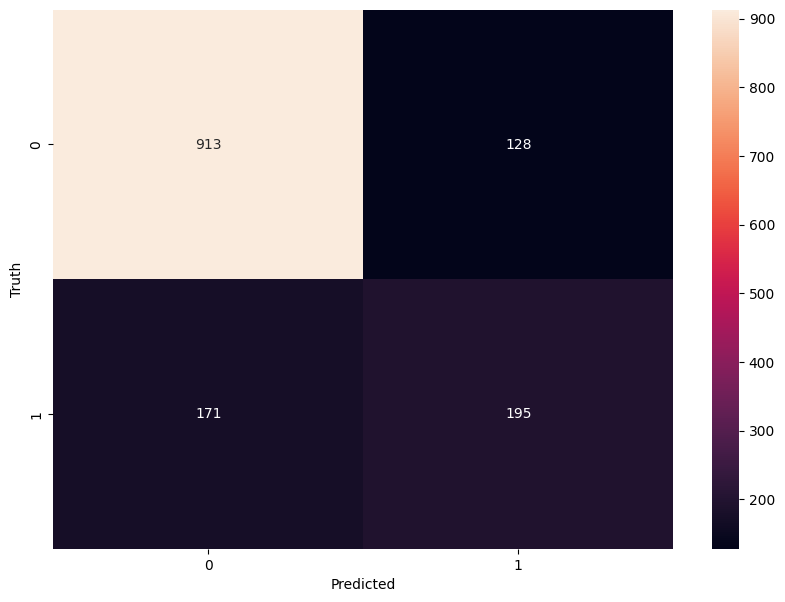

In [132]:
import seaborn as sm
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sm.heatmap(cm,annot=True,fmt='d')
plt.ylabel("Truth")
plt.xlabel("Predicted")

<center>
<h1 style="color:red;">Excersize</h1>
</center>


| Download latest version             |                                                  
| ---------------------- | 
| import kagglehub     |
| path = kagglehub.dataset_download("barelydedicated/bank-customer-churn-modeling") | 
| print("Path to dataset files:", path)    |








In [133]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("barelydedicated/bank-customer-churn-modeling")

print("Path to dataset files:", path)

100%|██████████| 262k/262k [00:01<00:00, 242kB/s]

Extracting files...
Path to dataset files: C:\Users\Nabeel\.cache\kagglehub\datasets\barelydedicated\bank-customer-churn-modeling\versions\1


In [146]:
df = pd.read_csv('../Datasets/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [148]:
df.drop('CustomerId',axis='columns',inplace=True)

In [149]:
df.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [150]:
df.dtypes

RowNumber            int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [153]:
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [152]:
df.RowNumber.describe()

count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: RowNumber, dtype: float64

In [159]:
df.drop('RowNumber',axis='columns',inplace=True)

In [161]:
df.drop('Surname',axis='columns',inplace=True)

In [166]:
for col in df:
    if df[col].dtypes == "object":
        print(col,df[col].unique())

Geography ['France' 'Spain' 'Germany']
Gender ['Female' 'Male']


In [168]:
df1 = pd.get_dummies(data=df,columns=['Geography', 'Gender' ],drop_first=True)

In [171]:
bools_cols = df1.select_dtypes(include='bool').columns
df1[bools_cols] = df1[bools_cols].astype(int)

In [172]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [174]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure' ,'Balance' ,'NumOfProducts', 'EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [175]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1,0


In [176]:
from sklearn.model_selection import train_test_split
X = df1.drop('Exited',axis='columns')
y = df1.Exited
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [177]:
X_train.shape,X_test.shape

((8000, 11), (2000, 11))

In [179]:
model = keras.Sequential([
    keras.layers.Dense(11,input_shape=(11,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [181]:
model.fit(X_train,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7983 - loss: 0.4590 - val_accuracy: 0.8238 - val_loss: 0.4105
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8093 - loss: 0.4409 - val_accuracy: 0.8325 - val_loss: 0.4050
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8138 - loss: 0.4354 - val_accuracy: 0.8288 - val_loss: 0.3956
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8118 - loss: 0.4334 - val_accuracy: 0.8338 - val_loss: 0.3896
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8234 - loss: 0.4160 - val_accuracy: 0.8400 - val_loss: 0.3855
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8151 - loss: 0.4297 - val_accuracy: 0.8363 - val_loss: 0.3745
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8210 - loss: 0.4122 - val_accuracy: 0.8413 - val_loss: 0.3694
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8242 - loss: 0.4070 - val_accuracy: 0.

In [182]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8677 - loss: 0.3307


[0.35666534304618835, 0.8550000190734863]

In [183]:
yp = model.predict(X_test)
yp

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[0.12324452],
       [0.5440413 ],
       [0.3136638 ],
       ...,
       [0.68562865],
       [0.08228713],
       [0.2650207 ]], dtype=float32)

In [186]:
y_pred = []
for y in yp:
    if y>0.5:y_pred.append(1)
    else:y_pred.append(0)

y_pred[:10],y_test[:10]

([0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
 7878    1
 3224    1
 1919    1
 4432    0
 4835    0
 4895    0
 7269    1
 1451    0
 1742    1
 4628    0
 Name: Exited, dtype: int64)

In [187]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1617
           1       0.74      0.38      0.50       383

    accuracy                           0.85      2000
   macro avg       0.80      0.67      0.71      2000
weighted avg       0.84      0.85      0.84      2000



Text(33.22222222222222, 0.5, 'Truth')

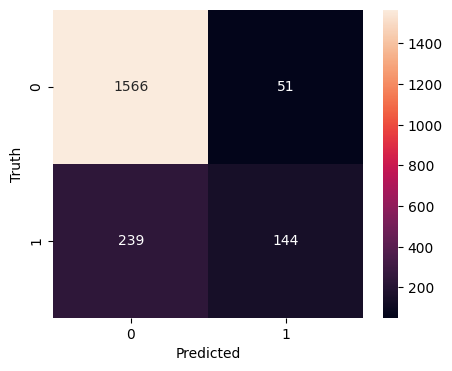

In [189]:
import seaborn as sn
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

#### Accuracy

In [195]:
round((1566+144)/(1566+51+237+144),2)

0.86

In [ ]:
# Precision For 0
round((1566)/(1566+239),2)

0.87

In [ ]:
# Precision For 1
round((144)/(144+51),2)

0.74

In [ ]:
# Recall For 0
round((1566)/(1566+51),2)

0.97

In [200]:
# Recall For 1
round((144)/(144+239),2)

0.38